# Author:- Hemant Bhutada , Manish Yadav, Nishant Yadav, Pankaj Baheti

# Mentor:- Dr.Aleefia Khurshid

Problem Statement:- Machine learning methods for water quality monitoring

In [ ]:
# Import all the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Read the dataset
df=pd.read_excel("/content/sample_data/final_dataset.xlsx")
df

,cod,tss,bod,ph,ammonia,temp,do,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,COD,TSS,BOD,PH,Ammonia,Temp,DO
0,26.66,43.22,9.10,7.57,3.41,25.70,6.83,NaN,NaN,NaN,NaN,NaN,NaN,0.135785,0.113382,0.023873,0.038592,0.013903,0.371622,0.583189
1,12.39,347.56,0.79,8.04,0.74,28.80,4.59,NaN,NaN,NaN,NaN,NaN,NaN,0.063105,0.911776,0.002072,0.045818,0.002722,0.581081,0.389081
2,11.53,108.66,1.16,8.01,1.39,27.03,6.67,NaN,NaN,NaN,NaN,NaN,NaN,0.058725,0.285055,0.003043,0.045357,0.005444,0.461486,0.569324
3,9.97,93.68,1.69,7.66,2.01,26.30,7.79,NaN,NaN,NaN,NaN,NaN,NaN,0.050779,0.245757,0.004433,0.039975,0.008041,0.412162,0.666378
4,12.45,53.61,0.99,8.00,6.10,27.30,7.55,NaN,NaN,NaN,NaN,NaN,NaN,0.063410,0.140639,0.002597,0.045203,0.025169,0.479730,0.645581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,70.97,72.89,30.13,7.63,9.38,25.40,0.25,NaN,NaN,NaN,NaN,NaN,NaN,0.361465,0.191217,0.079042,0.039514,0.038904,0.351351,0.012998
88,78.55,59.69,20.72,7.33,9.97,26.50,0.30,NaN,NaN,NaN,NaN,NaN,NaN,0.400071,0.156589,0.054356,0.034902,0.041375,0.425676,0.017331
89,1.59,0.00,1.04,7.53,1.10,27.40,6.52,NaN,NaN,NaN,NaN,NaN,NaN,0.008098,0.000000,0.002728,0.037977,0.004230,0.486486,0.556326
90,12.91,53.70,2.26,7.80,1.04,27.40,4.09,NaN,NaN,NaN,NaN,NaN,NaN,0.065753,0.140875,0.005929,0.042128,0.003978,0.486486,0.345754


In [ ]:
dfs=df.round(3)
dfs

,cod,tss,bod,ph,ammonia,temp,do,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,COD,TSS,BOD,PH,Ammonia,Temp,DO
0,26.66,43.22,9.10,7.57,3.41,25.70,6.83,NaN,NaN,NaN,NaN,NaN,NaN,0.136,0.113,0.024,0.039,0.014,0.372,0.583
1,12.39,347.56,0.79,8.04,0.74,28.80,4.59,NaN,NaN,NaN,NaN,NaN,NaN,0.063,0.912,0.002,0.046,0.003,0.581,0.389
2,11.53,108.66,1.16,8.01,1.39,27.03,6.67,NaN,NaN,NaN,NaN,NaN,NaN,0.059,0.285,0.003,0.045,0.005,0.461,0.569
3,9.97,93.68,1.69,7.66,2.01,26.30,7.79,NaN,NaN,NaN,NaN,NaN,NaN,0.051,0.246,0.004,0.040,0.008,0.412,0.666
4,12.45,53.61,0.99,8.00,6.10,27.30,7.55,NaN,NaN,NaN,NaN,NaN,NaN,0.063,0.141,0.003,0.045,0.025,0.480,0.646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,70.97,72.89,30.13,7.63,9.38,25.40,0.25,NaN,NaN,NaN,NaN,NaN,NaN,0.361,0.191,0.079,0.040,0.039,0.351,0.013
88,78.55,59.69,20.72,7.33,9.97,26.50,0.30,NaN,NaN,NaN,NaN,NaN,NaN,0.400,0.157,0.054,0.035,0.041,0.426,0.017
89,1.59,0.00,1.04,7.53,1.10,27.40,6.52,NaN,NaN,NaN,NaN,NaN,NaN,0.008,0.000,0.003,0.038,0.004,0.486,0.556
90,12.91,53.70,2.26,7.80,1.04,27.40,4.09,NaN,NaN,NaN,NaN,NaN,NaN,0.066,0.141,0.006,0.042,0.004,0.486,0.346


In [ ]:
#Droping the columns
dfs=dfs.drop(["cod","tss","bod","ph","ammonia","temp","do","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12"], axis=1)
dfs

,COD,TSS,BOD,PH,Ammonia,Temp,DO
0,0.136,0.113,0.024,0.039,0.014,0.372,0.583
1,0.063,0.912,0.002,0.046,0.003,0.581,0.389
2,0.059,0.285,0.003,0.045,0.005,0.461,0.569
3,0.051,0.246,0.004,0.040,0.008,0.412,0.666
4,0.063,0.141,0.003,0.045,0.025,0.480,0.646
...,...,...,...,...,...,...,...
87,0.361,0.191,0.079,0.040,0.039,0.351,0.013
88,0.400,0.157,0.054,0.035,0.041,0.426,0.017
89,0.008,0.000,0.003,0.038,0.004,0.486,0.556
90,0.066,0.141,0.006,0.042,0.004,0.486,0.346


In [ ]:
#Cheking the dimension of the dataset
dfs.shape

(92, 7)

In [ ]:
#Checking the Summary of the dataset
dfs.describe()

,COD,TSS,BOD,PH,Ammonia,Temp,DO
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,0.140152,0.165522,0.017967,0.049424,0.026739,0.478217,0.469163
std,0.194348,0.227967,0.025719,0.100698,0.107351,0.245156,0.251125
min,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000
25%,0.046000,0.024000,0.004000,0.033750,0.001000,0.248250,0.346000
50%,0.046500,0.041000,0.008000,0.041000,0.004000,0.480000,0.509000
75%,0.115250,0.233250,0.011500,0.044000,0.021000,0.677500,0.655000
max,1.000000,1.000000,0.113000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dfs.columns

Index(['COD', 'TSS', 'BOD', 'PH', 'Ammonia', 'Temp', 'DO'], dtype='object')

In [ ]:
#Checking the data types in the dataset
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COD      92 non-null     float64
 1   TSS      92 non-null     float64
 2   BOD      92 non-null     float64
 3   PH       92 non-null     float64
 4   Ammonia  92 non-null     float64
 5   Temp     92 non-null     float64
 6   DO       92 non-null     float64
dtypes: float64(7)
memory usage: 5.2 KB


In [ ]:
#Checking the missing value or null value in the dataset
dfs.isnull().sum()

COD        0
TSS        0
BOD        0
PH         0
Ammonia    0
Temp       0
DO         0
dtype: int64

In [ ]:
#Checking the correlation of the dataset
dfs.corr()

,COD,TSS,BOD,PH,Ammonia,Temp,DO
COD,1.000000,0.619535,0.955824,-0.060851,0.234345,-0.039825,-0.647668
TSS,0.619535,1.000000,0.514774,-0.066838,0.222838,0.171067,-0.420130
BOD,0.955824,0.514774,1.000000,-0.054010,0.213624,-0.062334,-0.658453
PH,-0.060851,-0.066838,-0.054010,1.000000,-0.065403,0.211546,0.007347
Ammonia,0.234345,0.222838,0.213624,-0.065403,1.000000,0.091057,-0.109809
Temp,-0.039825,0.171067,-0.062334,0.211546,0.091057,1.000000,-0.190648
DO,-0.647668,-0.420130,-0.658453,0.007347,-0.109809,-0.190648,1.000000


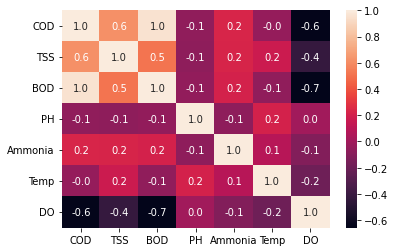

In [ ]:
#Cheking the Co relation of the dataset using heatmap diagram
sns.heatmap(dfs.corr(),annot=True,fmt='.1f')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


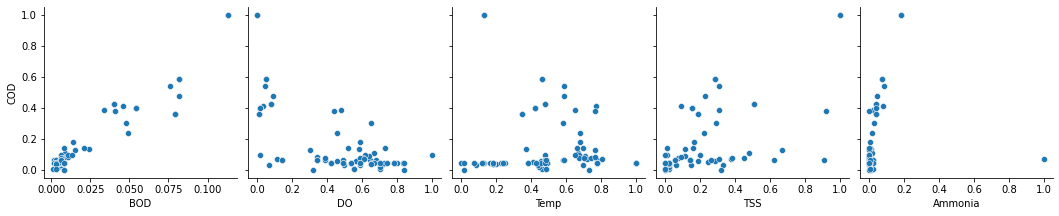

In [ ]:
#Pairplot w.r.t COD
sns.pairplot(dfs, x_vars=['BOD', 'DO','Temp','TSS','Ammonia'], y_vars='COD',size=3, aspect=1, kind='scatter')
plt.show()

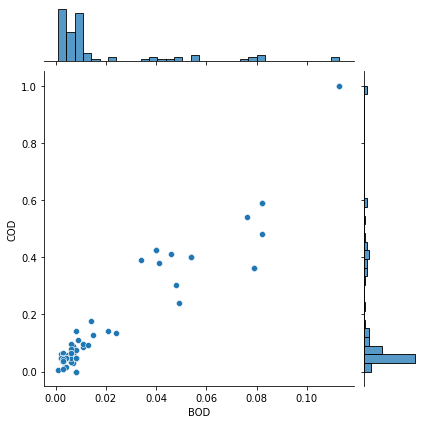

In [ ]:
sns.jointplot(x='BOD',y='COD',data=dfs,kind='scatter')

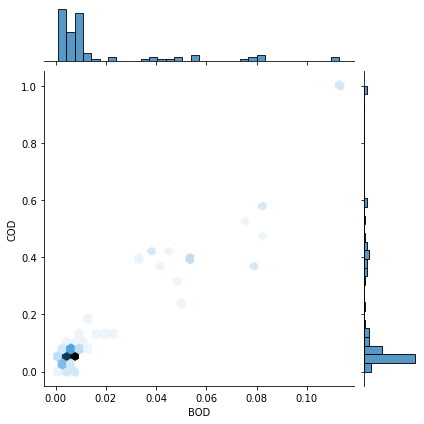

In [ ]:
sns.jointplot(x='BOD',y='COD',data=dfs,kind='hex')

[]

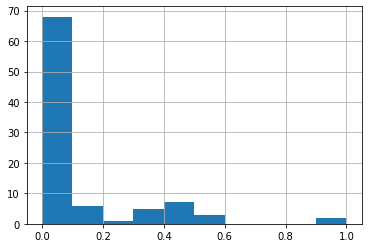

In [ ]:
#visiualize the COD  frequency
dfs['COD'].hist().plot()

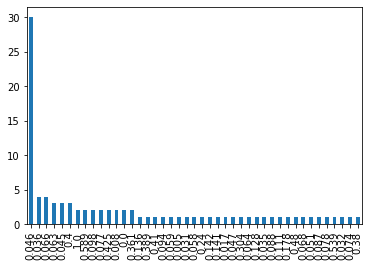

In [ ]:
# plotting the bar plot of frequencies
dfs['COD'].value_counts().plot.bar()

In [ ]:
#Taking the independent Parameters of the dataset
X=df.iloc[:,:4]
X

,BOD(mg/l),AMMONIA(mg/l),TSS(mg/l),NITRATE(mg/l)
0,3.00,1.10,9.00,0.69
1,1.20,0.27,9.00,0.74
2,0.59,1.10,9.00,2.40
3,2.26,1.04,53.70,1.42
4,2.40,5.04,22.17,1.70
...,...,...,...,...
56,20.72,9.97,59.69,5.79
57,0.20,0.00,0.00,1.08
58,1.04,1.10,0.00,1.39
59,2.26,1.04,53.70,1.42


In [ ]:
#Taking the Target parameters of the dataset
y=df.iloc[:,-1]
y

0      9.00
1      7.04
2      9.00
3     12.91
4     12.89
      ...  
56    78.55
57     0.00
58     1.59
59    12.91
60     9.00
Name: COD(mg/l), Length: 61, dtype: float64

In [ ]:
#Tarining and testing the data
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=1)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 66.40742821,   5.56974869,   6.23603756,   3.67294732,
        13.87556787,  13.87556787,   6.23603756,   7.38805544,
         7.04156345, 112.41070555,  13.03809568,  50.88029661,
         4.09010387,   7.4007578 ,  13.87556787,   7.4007578 ,
         6.98816772,   7.40089908,   7.56206551,   5.56974869,
         6.6243    ,   1.73031318,  50.88029661,   3.67294732,
         4.09010387])

In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)

0.7953928045258571


In [ ]:
#For retrieving the slope:
print(regressor.coef_)

[ 1.62162322  2.99097214 -0.01811797  0.56536642]


In [ ]:
# Accuracy Of the Data
regressor.score(X_test,y_test)

0.8903538058386007

In [ ]:
y_test

40     78.55
42      9.00
2       9.00
49      7.05
51      9.00
26      9.00
34      9.00
36      9.00
41      9.00
39    115.61
24      9.00
54     83.50
46      8.74
3      12.91
27      9.00
59     12.91
21      9.23
10      3.36
53      9.00
19      9.00
33      9.00
57      0.00
17     83.50
52      7.05
50      8.74
Name: COD(mg/l), dtype: float64

In [ ]:
y_pred

array([ 66.40742821,   5.56974869,   6.23603756,   3.67294732,
        13.87556787,  13.87556787,   6.23603756,   7.38805544,
         7.04156345, 112.41070555,  13.03809568,  50.88029661,
         4.09010387,   7.4007578 ,  13.87556787,   7.4007578 ,
         6.98816772,   7.40089908,   7.56206551,   5.56974869,
         6.6243    ,   1.73031318,  50.88029661,   3.67294732,
         4.09010387])

In [ ]:
dfs = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfs

,Actual,Predicted
40,78.55,66.407428
42,9.00,5.569749
2,9.00,6.236038
49,7.05,3.672947
51,9.00,13.875568
26,9.00,13.875568
34,9.00,6.236038
36,9.00,7.388055
41,9.00,7.041563
39,115.61,112.410706


In [ ]:
# Accuracy Of the Data
regressor.score(X_test,y_test)

0.8903538058386007

In [ ]:
regressor.score(X_train,y_train)

0.9899113049232141

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.164157680398745
Mean Squared Error: 103.09796818706957
Root Mean Squared Error: 10.153716964100859


# Regularization Method for Incresing efficiency of Algorithm

# Lasso Regression Algorithm

In [ ]:
from sklearn.linear_model import Lasso
lasso_regressor=Lasso()
lasso_regressor.fit(X_train,y_train)
prediction_lasso=lasso_regressor.predict(X_test)
prediction_lasso

array([ 66.03942095,   5.39672288,   5.53122609,   4.16191732,
         9.97714199,   9.97714199,   5.53122609,   7.06390861,
         7.98859832, 106.07062454,   9.23475235,  54.34314215,
         4.47657284,   8.32502436,   9.97714199,   8.32502436,
         7.77071145,   7.48669117,   8.35979313,   5.39672288,
         6.70073999,   1.92098311,  54.34314215,   4.16191732,
         4.47657284])

In [ ]:
print("Lasso")
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction_lasso})
df

Lasso


,Actual,Predicted
40,78.55,66.039421
42,9.00,5.396723
2,9.00,5.531226
49,7.05,4.161917
51,9.00,9.977142
26,9.00,9.977142
34,9.00,5.531226
36,9.00,7.063909
41,9.00,7.988598
39,115.61,106.070625


In [ ]:
lasso_regressor.score(X_test,y_test)

0.9094265318588517

In [ ]:
lasso_regressor.score(X_train,y_train)

0.988834383314928

In [ ]:
print("Lasso Regression")
mae_lasso=metrics.mean_absolute_error(y_test,prediction_lasso)
print('Mean Absolute Error:',mae_lasso)    
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))

Lasso Regression
Mean Absolute Error: 5.381633772749371
Root Mean Squared Error: 9.22845016087361


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_regressor=Ridge()
ridge_regressor.fit(X_train,y_train)
prediction_ridge=ridge_regressor.predict(X_test)
prediction_ridge

array([ 67.31681083,   4.84035385,   5.66467859,   3.57653041,
         9.94378606,   9.94378606,   5.66467859,   7.18180091,
         7.40195872, 108.44308998,   8.99483719,  44.97818905,
         4.071934  ,   4.76577817,   9.94378606,   4.76577817,
         8.53241724,   7.54677565,   7.87643315,   4.84035385,
         7.50259055,   1.9812582 ,  44.97818905,   3.57653041,
         4.071934  ])

In [ ]:
print("Ridge")
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction_ridge})
df

Ridge


,Actual,Predicted
40,78.55,67.316811
42,9.00,4.840354
2,9.00,5.664679
49,7.05,3.576530
51,9.00,9.943786
26,9.00,9.943786
34,9.00,5.664679
36,9.00,7.181801
41,9.00,7.401959
39,115.61,108.443090


In [ ]:
ridge_regressor.score(X_test,y_test)

0.8538046496040007

In [ ]:
print("Ridge Regression")
mae_ridge=metrics.mean_absolute_error(y_test, prediction_ridge)
print('Mean Absolute Error:',mae_ridge )   
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_ridge)))

Ridge Regression
Mean Absolute Error: 6.34978101304666
Root Mean Squared Error: 11.724519480888501


# Elastic Net Algorithm

In [ ]:
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet()
model_enet.fit(X_train, y_train) 
prediction_elasticnet= model_enet.predict(X_test)
prediction_elasticnet

array([ 65.52427415,   5.63764186,   5.45913038,   4.41268646,
         9.99282331,   9.99282331,   5.45913038,   7.00392403,
         8.25026341, 105.08250963,   9.34226761,  58.40132021,
         4.64607944,   9.86159361,   9.99282331,   9.86159361,
         7.43463862,   7.45320279,   8.57554126,   5.63764186,
         6.3435424 ,   1.88777549,  58.40132021,   4.41268646,
         4.64607944])

In [ ]:
print("Elastic Net")
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction_elasticnet})
df

Elastic Net


,Actual,Predicted
40,78.55,65.524274
42,9.00,5.637642
2,9.00,5.459130
49,7.05,4.412686
51,9.00,9.992823
26,9.00,9.992823
34,9.00,5.459130
36,9.00,7.003924
41,9.00,8.250263
39,115.61,105.082510


In [ ]:
model_enet.score(X_test,y_test)

0.9280006076662045

In [ ]:
model_enet.score(X_train,y_train)

0.9884967052927085

In [ ]:
print("Elastic_net Regression")
mae_elasticnet=metrics.mean_absolute_error(y_test, prediction_elasticnet)
print('Mean Absolute Error:',mae_elasticnet )   
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction_elasticnet)))

Elastic_net Regression
Mean Absolute Error: 4.961604736220981
Root Mean Squared Error: 8.227969778291717


Text(0, 0.5, 'Mean Absolute Error')

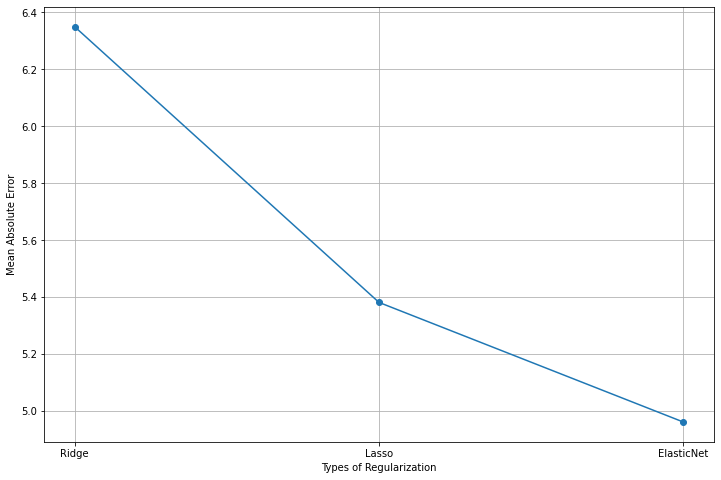

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(["Ridge","Lasso","ElasticNet"],[mae_ridge,mae_lasso,mae_elasticnet],marker='o')
plt.grid()
plt.xlabel("Types of Regularization")
plt.ylabel("Mean Absolute Error")

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(3, activation='cost'))


In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200


ValueError: ignored

In [ ]:
	
...
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

6/6 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 0.0000e+00
Accuracy: 0.00


In [ ]:

import tensorflow as tf

In [ ]:
input_size=4
output_size=1
models = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size)
                            ])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
models.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 7596360.0000
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 3527519185666048.0000
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 7048429429431134047961088.0000
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 3259793538532844576420438596386816.0000
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: inf
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: inf
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: inf
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: inf
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: inf
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: nan
Epoch 12/100
2/2 [==============================] - 0s 4ms/step - loss: nan
Epoch 1

In [ ]:
out=training_data['targets'].round(1)
from sklearn.metrics import mean_squared_error
mean_squared_error(generated_target, out, squared=False)

NameError: ignored

In [ ]:
TargetVariable=['COD(mg/l)']
Predictors=['BOD(mg/l)', 'AMMONIA(mg/l)', 'TSS(mg/l)', 'NITRATE(mg/l)','DO(mg/l)','PH','TEMPERATURE(C)']

In [ ]:
X=df[Predictors].values
y=df[TargetVariable].values

In [ ]:
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

In [ ]:
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

In [ ]:
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

In [ ]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 

In [ ]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(121, 7)
(121, 1)
(52, 7)
(52, 1)


In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])


 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7918 - accuracy: 0.0000e+00
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7900 - accuracy: 0.0000e+00
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7881 - accuracy: 0.0000e+00
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7855 - accuracy: 0.0000e+00
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7823 - accuracy: 0.0000e+00
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7779 - accuracy: 0.0000e+00
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7728 - accuracy: 0.0000e+00
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7649 - accuracy: 0.0000e+00
Epoch 9/50
7/7 [==============================] - 0s 2ms/step - loss: 0.7558 - accuracy: 0.0000e+00
Epoch 10/50
7/7 [==============================] - 0s 3ms/step - loss: 0.7455 - accuracy: 0.0000e+00

6/6 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 0.0000e+00


TypeError: ignored

In [ ]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 

In [ ]:
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 144.22856794483118
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 108.60901129308053
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 113.40940269705463
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 108.77263247819683
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 162.88437776662488
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 156.54537704417248
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 100.41545426352128
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 108.70415825961402
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 164.2457714948339
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 165.82343599701187
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 115.91167241828035
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 111.75738633969034
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 166.7844552315314
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 158.24230309133156
15 Param